In [19]:
import nilearn as nl
from nilearn import plotting, image, masking
import json
import numpy as np
import nibabel as nb
import pandas as pd
import glob

In [9]:
merged_qc = pd.read_csv('../data/merged_qc.csv', index_col=False)

In [32]:
first_three_rows = merged_qc.head(10)
first_three_rows

,aor,aqi,bids_meta,dummy_trs,dvars_nstd,dvars_std,dvars_vstd,efc,fber,fd_mean,...,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Feeding or Eating Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder,Unspecified Trauma- and Stressor-Related Disorder,imaging_site,max_fd,t1_exists
0,0.001634,0.011370,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",0,31.320980,0.998533,0.988834,0.489231,1225.898438,0.149726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU,1.475588,1
1,0.030871,0.069020,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",0,100.102069,1.191695,1.183819,0.537480,677.013855,2.853728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,27.397148,1
2,0.000461,0.004402,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",2,26.360379,1.038065,0.995616,0.480758,2013.960938,0.120238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU,0.362444,1
3,0.014249,0.051829,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",4,62.831196,1.060205,1.054771,0.510687,1170.000854,1.230934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteRU,32.560967,1
4,0.001283,0.010898,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",0,48.614155,1.172940,0.991999,0.535286,908.762024,0.342414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCUNY,3.439329,1
5,0.010429,0.023842,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",0,54.260690,1.050079,0.991560,0.514512,1087.080444,0.608782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,12.434461,1
6,0.000821,0.006552,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",4,37.400328,1.072347,1.004517,0.529474,823.885742,0.149393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,1.109007,1
7,0.001119,0.011860,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",2,45.495832,1.128268,0.999489,0.515749,1154.753662,0.255216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,NaN,1
8,0.000283,0.005256,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",1,40.103689,1.107372,1.002612,0.542568,915.536743,0.112665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,0.308301,1
9,0.010143,0.024974,"{'AcquisitionMatrixPE': 84, 'BandwidthPerPixel...",0,58.692195,1.090858,1.044305,0.546039,717.718750,0.750295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HBNsiteCBIC,13.720056,1


In [ ]:
for index, row in merged_qc.iterrows():
    #t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*T1w.nii.gz'
    t1_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}_*_T1w.nii.gz'
    
    matching_files = glob.glob(t1_file)
    if matching_files:
        #print(f"{t1_file} exists")
        matching_files = [file for file in matching_files if 'space-MNI152NLin2009cAsym' not in file]

        img_t1=matching_files[0]
        t1_img = nb.load(img_t1)

        #print(img_t1)
        mask_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{row["sub"]}/ses-{row["ses"]}/anat/sub-{row["sub"]}_ses-{row["ses"]}*brain_mask.nii.gz'
        matching_mask_files=glob.glob(mask_file)
        #print(matching_mask_files)

        matching_mask_files = [file for file in matching_mask_files if 'space-MNI152NLin2009cAsym' not in file]

        img_mask=matching_mask_files[0]
        #print(img_mask)

        mask_img = nb.load(img_mask)

        masked_data=masking.apply_mask(img_t1, img_mask)
        t1_data = t1_img.get_fdata()
        mask_data = mask_img.get_fdata()

        masked_t1_data = np.zeros(t1_data.shape)
        
        # Fill the 3D array with the masked data
        masked_t1_data[mask_data > 0] = masked_data
        
        # Create a new Nifti image
        masked_t1_img = nib.Nifti1Image(masked_t1_data, affine=t1_img.affine)

        # plotting.plot_anat(masked_t1_img, title='Masked T1 Image')
        # plotting.show()
    else:
        print(f"{t1_file} does not exist")
    nb.save(masked_t1_img, f'../../kwyk/brain_masked_t1s/sub-{row["sub"]}_masked-t1.nii.gz')


/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAC853DTE/ses-HBNsiteRU/anat/sub-NDARAC853DTE_ses-HBNsiteRU_*_T1w.nii.gz does not exist
/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAL606CW5/ses-HBNsiteCBIC/anat/sub-NDARAL606CW5_ses-HBNsiteCBIC_*_T1w.nii.gz does not exist
/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAM357BUA/ses-HBNsiteCUNY/anat/sub-NDARAM357BUA_ses-HBNsiteCUNY_*_T1w.nii.gz does not exist
/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAP782TVC/ses-HBNsiteRU/anat/sub-NDARAP782TVC_ses-HBNsiteRU_*_T1w.nii.gz does not exist
/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAR372FHB/ses-HBNsiteCUNY/anat/sub-NDARAR372FHB_ses-HBNsiteCUNY_*_T1w.nii.gz does not exist
/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARAR537GD3/ses-HBNsiteCBIC/anat/sub-NDARAR537GD3_ses-HBNsiteCBIC_*_T1w.nii.gz does not 

In [5]:
img_t1='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-preproc_T1w.nii.gz'
# plotting.plot_img(img)
img_mask='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-brain_mask.nii.gz'
#plotting.plot_img(img)


In [9]:
img_masked=masking.apply_mask(img_t1, img_mask)
#plotting.plot_img(img_masked)


In [17]:
t1_img = nib.load(img_t1)

# Load the mask that was used to create the 2D numpy array
mask_img = nib.load(img_mask)


masked_data = img_masked  # Replace with your actual data

# Get the data from the T1 and mask images
t1_data = t1_img.get_fdata()
mask_data = mask_img.get_fdata()

In [19]:
# Create an empty 3D array with the same shape as the T1 image
masked_t1_data = np.zeros(t1_data.shape)

# Fill the 3D array with the masked data
masked_t1_data[mask_data > 0] = masked_data

# Create a new Nifti image
masked_t1_img = nib.Nifti1Image(masked_t1_data, affine=t1_img.affine)


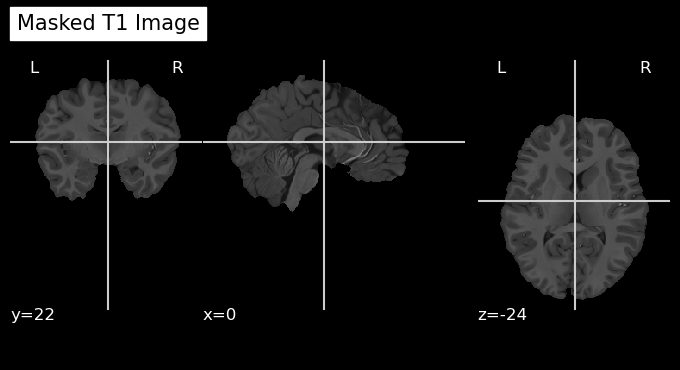

In [20]:
plotting.plot_anat(masked_t1_img, title='Masked T1 Image')
plotting.show()

In [ ]:
nb.save(masked_t1_img, 'masked_t1_img.nii.gz')